In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# the pandas webreader provides remote data access to apis
import pandas_datareader as webreader

date_today = "2020-01-01"
date_start = "2010-01-01"

# set the symbol to bitcoin-usd quotes
# for more symbols check yahoo.finance.com
symbol = "BTC-USD"

In [3]:
# now we will send the request to the yahoo finance api endpoint
df = webreader.DataReader(symbol, start=date_start, end=date_today, data_source="yahoo")
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014


In [4]:
df = df.drop(['Adj Close'], axis=1)

In [5]:

df.isnull().sum()

High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64

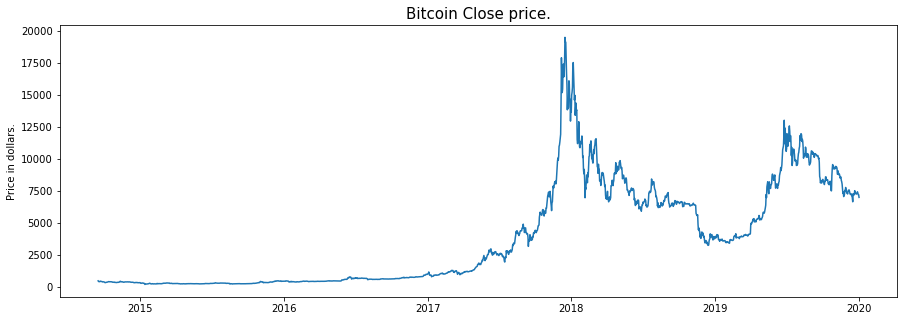

In [6]:

plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [9]:
features = ['Open', 'High', 'Low', 'Close']

In [10]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

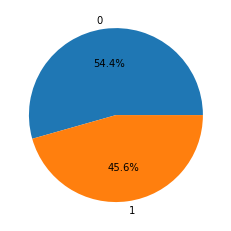

In [11]:

plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [12]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
  
scaler = StandardScaler()
features = scaler.fit_transform(features)
  
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

KeyError: "['is_quarter_end'] not in index"